# Práctica 10: Datos Multivariados
- Martínez Ostoa Néstor Iván
- Visualización de la Información
- LCD, IIMAS, UNAM

## 1. Exploración de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
# ------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
null_count = [train_df[c].isna().sum() for c in train_df.columns]
temp_df = pd.DataFrame(data={'Column name':train_df.columns, 'Number of null values':null_count})
temp_df = temp_df.sort_values(by='Number of null values')
temp_df = temp_df[temp_df['Number of null values'] > 0]

In [5]:
temp_df.head()

,Column name,Number of null values
42,Electrical,1
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37


### 1.1 Valores faltantes?

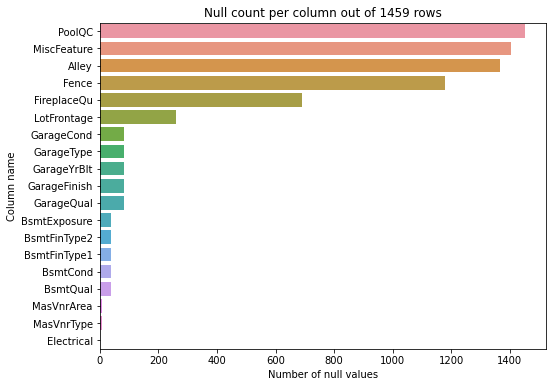

In [6]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    x="Number of null values", y="Column name", 
    data=temp_df[::-1]
).set(
    title=f'Null count per column out of {train_df.shape[0]} rows'
)
plt.show()

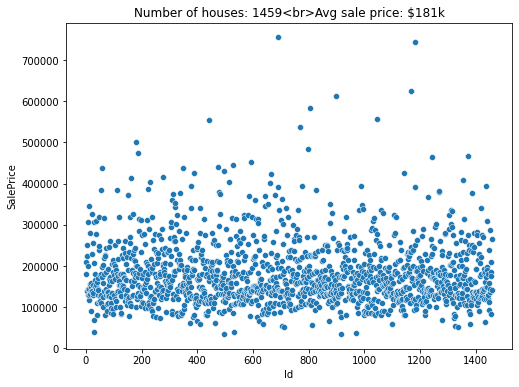

In [7]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    data=train_df, x="Id", y="SalePrice"
).set(
    title=f"Number of houses: {train_df.shape[0]}<br>Avg sale price: ${round(np.mean(train_df['SalePrice']/1000))}k"
)
plt.show()

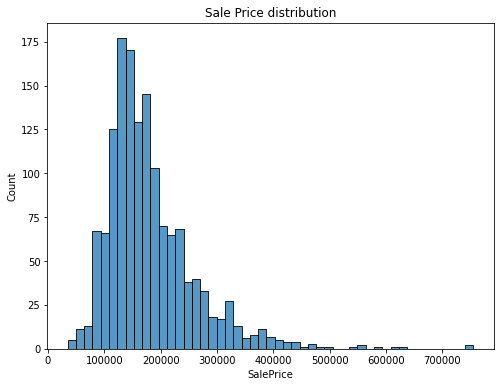

In [8]:
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=train_df, x='SalePrice').set(
    title="Sale Price distribution"
)
plt.show()

## 2. Limpieza de datos

### 2.1 Reemplazo de ```nan```

In [9]:
nan_replacements = dict.fromkeys(temp_df['Column name'])
nan_replacements["PoolQC"] = "No Pool"
nan_replacements["MiscFeature"] = "None"
nan_replacements["Alley"] = "No Alley"
nan_replacements["Fence"] = "No Fence"
nan_replacements["FireplaceQu"] = "No Fireplace"
nan_replacements["LotFrontage"] = 0
nan_replacements["GarageCond"] = "No Garage"
nan_replacements["GarageType"] = "No Garage"
#--------
#nan_replacements["GarageYrBlt"] <- year 0 would be incorrect, thus, this remains nan
nan_replacements.pop("GarageYrBlt")
#--------
nan_replacements["GarageFinish"] = "No Garage"
nan_replacements["GarageQual"] = "No Garage"
nan_replacements["BsmtExposure"] = "No Basement"
nan_replacements["BsmtFinType2"] = "No Basement"
nan_replacements["BsmtFinType1"] = "No Basement"
nan_replacements["BsmtCond"] = "No Basement"
nan_replacements["BsmtQual"] = "No Basement"
nan_replacements["MasVnrArea"] = 0
nan_replacements["MasVnrType"] = "None"
nan_replacements["Electrical"] = train_df["Electrical"].mode().values[0] #most common Electrical element
#--------
train_df = train_df.fillna(value=nan_replacements)

### 2.2 Reemplazo de nombres

In [10]:
train_df.replace(
    {
        'MSZoning': {'C (all)': 'C'},
        'Exterior2nd': {'Brk Cmn': 'BrkComm'}
    }, 
    inplace=True
)
print(train_df["MSZoning"].unique())
print(train_df["Exterior2nd"].unique())

['RL' 'RM' 'C' 'FV' 'RH']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'BrkComm' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


## 3. Selección de características relevantes por medio de análisis de correlación

### 3.1 Matriz de correlación

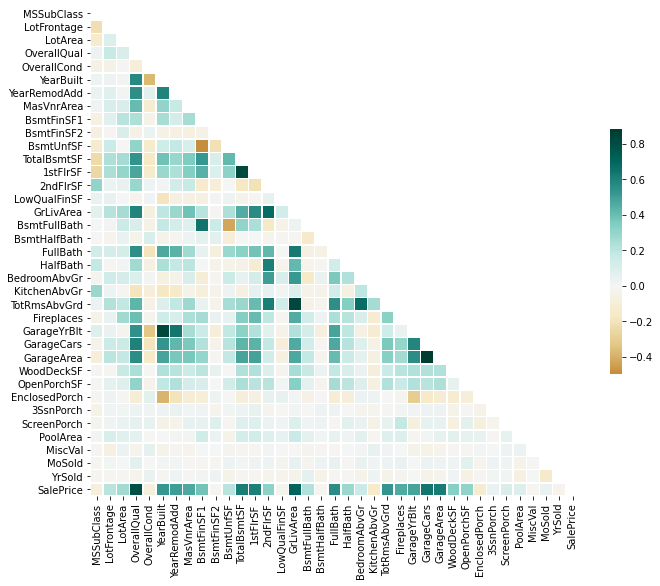

In [11]:
corr = train_df.iloc[:, 1:].corr(method='pearson') #Removing ID
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap="BrBG", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### 3.2 Filtrando por coeficiente de correlación de Pearson

Obtenemos aquellas variables que tengan un coeficiente de correlación de Pearson mayor a $0.3$ con respecto a la variable ```SalePrice```

In [12]:
top_correlated = corr[corr["SalePrice"] > 0.2].loc[:, "SalePrice"].to_frame()
top_correlated_columns = top_correlated.index.values
print(f"Number of variables: {top_correlated.shape[0]}\n")
print(top_correlated_columns)
top_correlated

Number of variables: 23

['LotFrontage' 'LotArea' 'OverallQual' 'YearBuilt' 'YearRemodAdd'
 'MasVnrArea' 'BsmtFinSF1' 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF'
 'GrLivArea' 'BsmtFullBath' 'FullBath' 'HalfBath' 'TotRmsAbvGrd'
 'Fireplaces' 'GarageYrBlt' 'GarageCars' 'GarageArea' 'WoodDeckSF'
 'OpenPorchSF' 'SalePrice']


,SalePrice
LotFrontage,0.209799
LotArea,0.263843
OverallQual,0.790972
YearBuilt,0.522877
YearRemodAdd,0.507015
MasVnrArea,0.472531
BsmtFinSF1,0.386783
BsmtUnfSF,0.214281
TotalBsmtSF,0.613792
1stFlrSF,0.605971


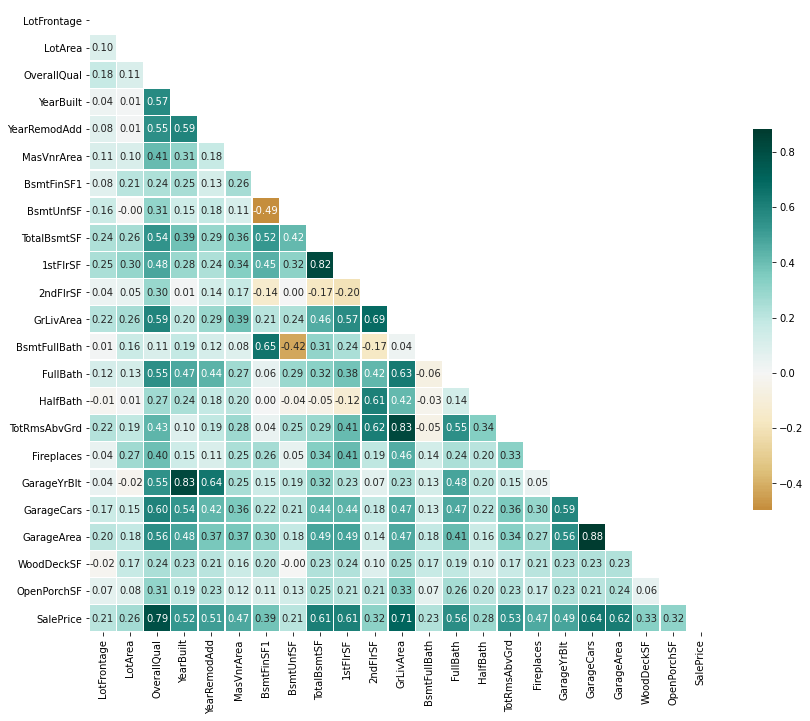

In [13]:
corr = train_df[top_correlated_columns].iloc[:, :].corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corr, mask=mask, cmap="BrBG", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt='.2f')
plt.show()

Columnas a borrar debido a una alta correlación con otra columna: 
- ```1stFlrSF```
- ```TotRmsAbvGrd```
- ```GarageYrBlt```
- ```GarageCars```

In [14]:
cols_to_delete = ["1stFlrSF", "TotRmsAbvGrd", "GarageYrBlt", "GarageCars"]
top_correlated_columns = np.array([c for c in top_correlated_columns if c not in cols_to_delete])
top_correlated_columns

array(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'], dtype='<U12')

### 3.3 Gráficos con las características seleccionadas

In [15]:
fig = make_subplots(rows=5, cols=4, subplot_titles=top_correlated_columns[:-1])
row, col = 1,1
for c in top_correlated_columns[:-1]:
    fig.add_trace(
        go.Scatter(
            y=train_df[top_correlated_columns]['SalePrice'], x=train_df[top_correlated_columns][c],
            showlegend=False, mode='markers'
        ),
        row = row, col = col
    )
    if col < 4: 
        col += 1
    else: 
        row += 1
        col = 1
fig.update_layout(height=900, width=1000, title_text="Top Correlated Colums vs. Sale Price ($USD)")
fig.show()

In [16]:
train_df[top_correlated_columns].describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.611378,10517.225497,6.100069,1971.272104,1984.879369,103.187800,443.374914,567.535984,1057.293352,347.230295,1515.641535,0.424949,1.565456,0.382454,0.613434,473.115147,93.804661,46.645648,180944.102810
std,34.673201,9984.675721,1.383171,30.212814,20.645927,180.773158,456.142186,441.874057,438.824912,436.583480,525.616607,0.518870,0.550906,0.502798,0.644687,213.815884,124.249421,66.276387,79464.918335
min,0.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7549.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.500000,795.500000,0.000000,1129.000000,0.000000,1.000000,0.000000,0.000000,336.000000,0.000000,0.000000,129950.000000
50%,63.000000,9477.000000,6.000000,1973.000000,1994.000000,0.000000,383.000000,479.000000,991.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,1.000000,480.000000,0.000000,25.000000,163000.000000
75%,79.000000,11603.000000,7.000000,2000.000000,2004.000000,164.500000,712.000000,808.000000,1298.500000,728.000000,1777.500000,1.000000,2.000000,1.000000,1.000000,576.000000,168.000000,68.000000,214000.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,3.000000,1418.000000,857.000000,547.000000,755000.000000


### 3.4 Distribución de las variables

In [17]:
train_df = train_df[top_correlated_columns]

In [18]:
fig = make_subplots(rows=5, cols=4, subplot_titles=top_correlated_columns)
row, col = 1,1
for c in top_correlated_columns:
    fig.add_trace(
        go.Histogram(
            x = train_df[c], showlegend=False
        ),
        row = row, col = col
    )
    if col < 4: 
        col += 1
    else: 
        row += 1
        col = 1
fig.update_layout(height=900, width=1000, title_text="Distribution for top correlated columns")
fig.show()

## 4. Estimación del precio de las casas

In [19]:
test_df = pd.read_csv('test.csv')
house_ids = test_df['Id']
test_df = test_df[top_correlated_columns[:-1]]
print(test_df.shape)
test_df.head()

(1459, 18)


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF
0,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,0,896,0.0,1,0,0,730.0,140,0
1,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,0,1329,0.0,1,1,0,312.0,393,36
2,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,701,1629,0.0,2,1,1,482.0,212,34
3,78.0,9978,6,1998,1998,20.0,602.0,324.0,926.0,678,1604,0.0,2,1,1,470.0,360,36
4,43.0,5005,8,1992,1992,0.0,263.0,1017.0,1280.0,0,1280,0.0,2,0,0,506.0,0,82


In [20]:
train_target_label = train_df["SalePrice"]
training_sample_df = train_df[top_correlated_columns[:-1]]
test_sample_df = test_df[top_correlated_columns[:-1]]

In [21]:
training_sample_df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF
0,65.0,8450,7,2003,2003,196.0,706,150,856,854,1710,1,2,1,0,548,0,61
1,80.0,9600,6,1976,1976,0.0,978,284,1262,0,1262,0,2,0,1,460,298,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,866,1786,1,2,1,1,608,0,42
3,60.0,9550,7,1915,1970,0.0,216,540,756,756,1717,1,1,0,1,642,0,35
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1053,2198,1,2,1,1,836,192,84


In [22]:
test_sample_df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF
0,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,0,896,0.0,1,0,0,730.0,140,0
1,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,0,1329,0.0,1,1,0,312.0,393,36
2,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,701,1629,0.0,2,1,1,482.0,212,34
3,78.0,9978,6,1998,1998,20.0,602.0,324.0,926.0,678,1604,0.0,2,1,1,470.0,360,36
4,43.0,5005,8,1992,1992,0.0,263.0,1017.0,1280.0,0,1280,0.0,2,0,0,506.0,0,82


In [23]:
print(training_sample_df.shape)
print(test_sample_df.shape)

(1459, 18)
(1459, 18)


### 4.1 Imputación por la mediana

In [24]:
imputer = SimpleImputer(strategy='median')
training_sample_df = imputer.fit_transform(training_sample_df)
test_sample_df = imputer.fit_transform(test_sample_df)

### 4.2 Estandarización

In [25]:
scaler = StandardScaler()
training_sample_df = scaler.fit_transform(training_sample_df)
test_sample_df = scaler.fit_transform(test_sample_df)

### 4.3 Regresión Lineal

In [26]:
X_train_split, X_test_split, y_train, y_test = train_test_split(
    training_sample_df, train_target_label, random_state=42,
    train_size=0.8
)
print(X_train_split.shape, X_test_split.shape, training_sample_df.shape, test_sample_df.shape)

(1167, 18) (292, 18) (1459, 18) (1459, 18)


In [27]:
model = LinearRegression()
model.fit(X_train_split, y_train)
model.fit(training_sample_df, train_target_label)
LinearRegression(copy_X = True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

### 4.4 Evaluación del modelo

In [28]:
print(f"Intercept: {model.intercept_}\n")
print(f"Slope (coefficient of x): \n{model.coef_}")

Intercept: 180944.10281014396

Slope (coefficient of x): 
[ 1.41994338e+03  4.66797585e+03  2.72831589e+04  5.98969793e+03
  7.21555479e+03  5.66596916e+03  3.98459229e+03 -1.00520111e+03
  5.27527054e+03 -2.62166395e+03  2.49189398e+04  3.19590884e+03
  1.63465402e+02  7.36171748e+00  4.75238559e+03  7.74015453e+03
  3.46252974e+03  2.71022716e+02]


In [29]:
print(f"Regression score: \n{model.score(training_sample_df, train_target_label)}\n")
print(f"Train_target_label: \n{train_target_label}")

Regression score: 
0.7937088330392428

Train_target_label: 
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 1459, dtype: int64


### 4.5 Predicciones

In [30]:
y_pred = model.predict(X_test_split)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: \n{rmse}")

Root Mean Squared Error: 
26793.771698019907


In [31]:
pred_on_test = model.predict(test_sample_df)
print(f"Regression score: \n{abs(model.score(test_sample_df, train_target_label))}")

Regression score: 
0.8067995477908481


In [32]:
house_predictions_df = pd.DataFrame()
house_predictions_df['House Id'] = house_ids
house_predictions_df['Predicted Sale Price'] = pred_on_test
house_predictions_df

,House Id,Predicted Sale Price
0,1461,123875.600898
1,1462,170602.799580
2,1463,183109.126906
3,1464,199931.669615
4,1465,198543.357673
...,...,...
1454,2915,64615.312872
1455,2916,77662.953307
1456,2917,194140.012993
1457,2918,112977.469295
